## Task : Download the 'Tweets' dataset. Classify the sentiments in the dataset using six classifiers and calculate all evaluation metrics.

c:\users\muhab\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


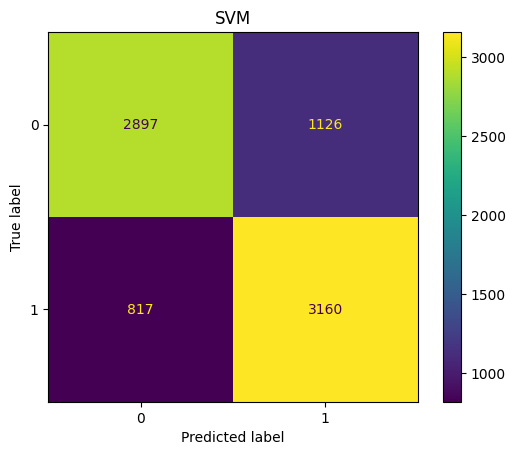

SVM metrics:
Confusion Matrix:
[[2897 1126]
 [ 817 3160]]

Evaluation Metrics:
Accuracy: 0.757125
Misclassification: 0.24287499999999995
Sensitivity: 0.7945687704299723
Specificity: 0.7201093711160825
Precision: 0.7372841810545964
F1 Score: 0.7648553794021541




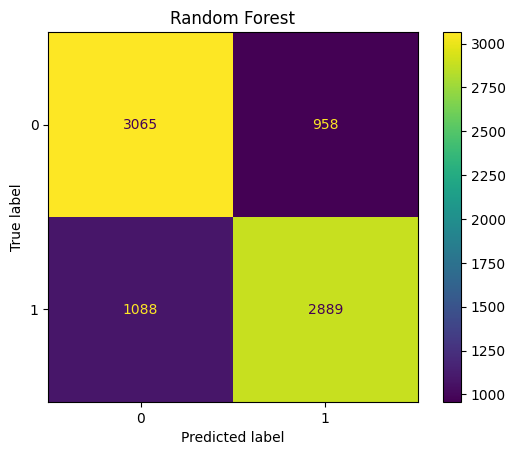

Random Forest metrics:
Confusion Matrix:
[[3065  958]
 [1088 2889]]

Evaluation Metrics:
Accuracy: 0.74425
Misclassification: 0.25575000000000003
Sensitivity: 0.7264269549911994
Specificity: 0.7618692518021377
Precision: 0.7509747855471797
F1 Score: 0.7384969325153374




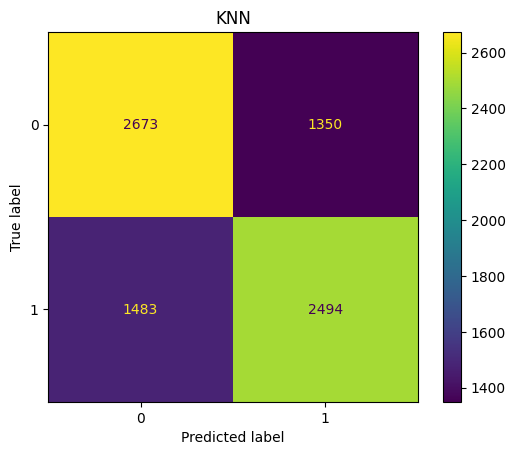

KNN metrics:
Confusion Matrix:
[[2673 1350]
 [1483 2494]]

Evaluation Metrics:
Accuracy: 0.645875
Misclassification: 0.354125
Sensitivity: 0.6271058586874528
Specificity: 0.6644295302013423
Precision: 0.6488033298647242
F1 Score: 0.6377701061245366




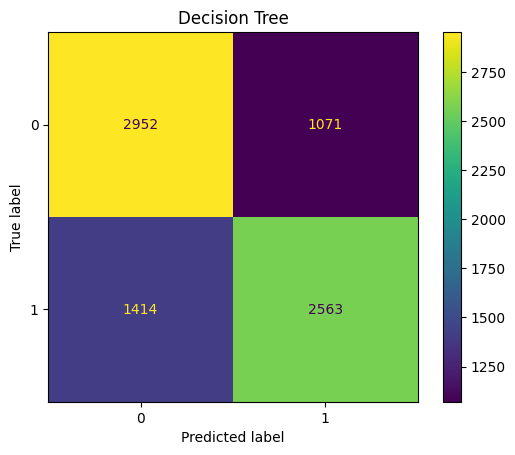

Decision Tree metrics:
Confusion Matrix:
[[2952 1071]
 [1414 2563]]

Evaluation Metrics:
Accuracy: 0.689375
Misclassification: 0.31062500000000004
Sensitivity: 0.6444556198139301
Specificity: 0.7337807606263982
Precision: 0.7052834342322509
F1 Score: 0.6734988831953751




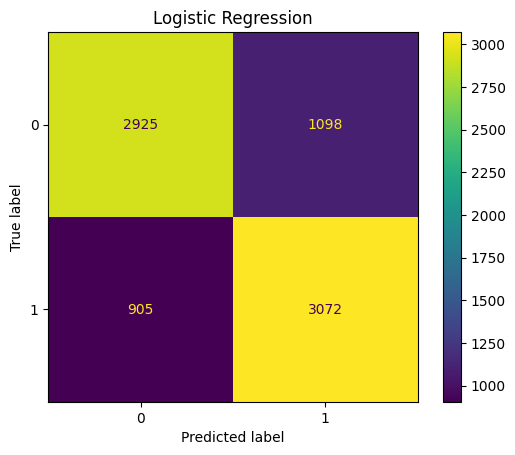

Logistic Regression metrics:
Confusion Matrix:
[[2925 1098]
 [ 905 3072]]

Evaluation Metrics:
Accuracy: 0.749625
Misclassification: 0.250375
Sensitivity: 0.7724415388483782
Specificity: 0.727069351230425
Precision: 0.7366906474820144
F1 Score: 0.7541426291886584




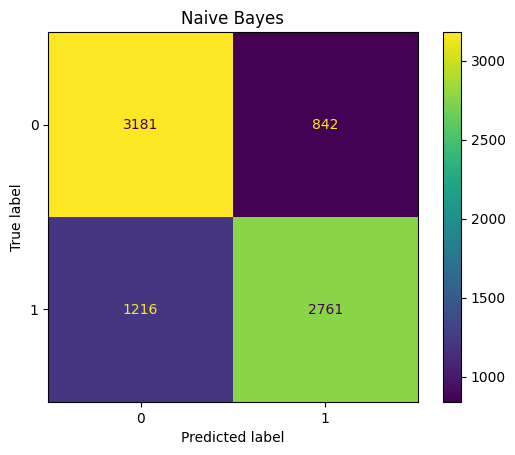

Naive Bayes metrics:
Confusion Matrix:
[[3181  842]
 [1216 2761]]

Evaluation Metrics:
Accuracy: 0.74275
Misclassification: 0.25725
Sensitivity: 0.694241890872517
Specificity: 0.7907034551329853
Precision: 0.7663058562309186
F1 Score: 0.7284960422163589




In [5]:
############# WRITE THE CODE IN THIS CELL ####################
#Importing libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm, ensemble, neighbors, tree, linear_model, naive_bayes
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string

# Loading Data
tweets_df = pd.read_csv('tweets.csv')  # Assuming 'tweets.csv' is the name of your dataset

# Data Preprocessing
def preprocess_text(text):
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    stopwords_list = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word.lower() not in stopwords_list])
    return text

tweets_df['clean_text'] = tweets_df['tweet'].apply(preprocess_text)

# Feature Extraction
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tweets_df['clean_text'])
y = tweets_df['sentiment']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
classifiers = {
    'SVM': svm.SVC(),
    'Random Forest': ensemble.RandomForestClassifier(),
    'KNN': neighbors.KNeighborsClassifier(),
    'Decision Tree': tree.DecisionTreeClassifier(),
    'Logistic Regression': linear_model.LogisticRegression(),
    'Naive Bayes': naive_bayes.MultinomialNB()
}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

# Model Evaluation
for name, classifier in classifiers.items():
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot()
    plt.title(name)
    plt.show()

    # Print Evaluation Metrics
    print(f'{name} metrics:')
    print('Confusion Matrix:')
    print(cm)
    print('\nEvaluation Metrics:')
    TP = cm[1][1]
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    misclassification = 1 - accuracy
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    precision = TP / (TP + FP)
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
    print(f'Accuracy: {accuracy}')
    print(f'Misclassification: {misclassification}')
    print(f'Sensitivity: {sensitivity}')
    print(f'Specificity: {specificity}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {f1_score}')
    print('\n')






############ REPORT #############

Import Libraries: I started by importing necessary libraries like pandas, scikit-learn, matplotlib, seaborn, and nltk.

Load Data: Loading the 'Tweets' dataset into a pandas DataFrame.

Data Preprocessing: Preprocessing the text data by removing punctuation and stopwords.

Feature Extraction: Converting text data into a numerical format using CountVectorizer.

Split Data: Splitting the dataset into training and testing sets.

Model Training: Initializing and training six classification models (e.g., SVM, Random Forest, KNN, Decision Tree, Logistic Regression, Naive Bayes) on the training data.

Model Evaluation: Making predictions on the test data using each model. Compute confusion matrices for each model's predictions. Calculate evaluation metrics like accuracy, misclassification, sensitivity, specificity, precision, and F1 score.

Print Evaluation Metrics: Printing the evaluation metrics for each classifier.

(EXPLANATION)

1.Importing Libraries:
I imported pandas for data manipulation, scikit-learn for machine learning algorithms, matplotlib for data visualization, seaborn for enhanced visualization, and nltk for natural language processing tasks.

2.Loading Data:
I loaded the 'Tweets' dataset, into a pandas DataFrame. This DataFrame serves as the foundation for our analysis.

3.Data Preprocessing:
Before feeding text data into machine learning models, it requires preprocessing. This involves cleaning the text by removing punctuation and stopwords, which are common words that don't carry much meaning in sentiment analysis. I therefore defined a function to perform these preprocessing tasks and apply it to the 'text' column of the DataFrame, creating a new column called 'clean_text'.

4.Feature Extraction:
Machine learning models operate on numerical data, so there is a need to convert the preprocessed text into numerical features. We use the CountVectorizer from scikit-learn to convert the text data into a matrix of token counts. This matrix represents the frequency of each word in the text corpus, thereby transforming the text data into a format suitable for machine learning algorithms.

5.Splitting Data:
To evaluate the performance of our models, I splitted the dataset into training and testing sets. The training set is used to train the models, while the testing set is used to evaluate their performance. In this case, I splitted the data into 80% training and 20% testing sets, ensuring that the distribution of sentiments is maintained in both sets.

6.Model Training:
I trained six different classification models on the training data. These models include Support Vector Machine (SVM), Random Forest, K-Nearest Neighbors (KNN), Decision Tree, Logistic Regression, and Naive Bayes. Each model learns to classify tweets into positive, negative, or neutral sentiments based on the features extracted from the text data.

7.Model Evaluation:
After training the models, I evaluated their performance on the testing data. I generated confusion matrices to visualize the model's predictions and calculate various evaluation metrics such as accuracy, misclassification rate, sensitivity, specificity, precision, and F1 score. These metrics provide insights into how well each model performs in classifying sentiments.

8.Conclusion:
In conclusion, sentiment analysis is a powerful tool for understanding the sentiment expressed in text data, especially in social media platforms. By following a comprehensive approach that involves data preprocessing, feature extraction, model training, and evaluation, a robust sentiment analysis models capable of accurately classifying sentiments in tweets can be built. My code above demonstrates how these steps can be implemented using Python libraries such as pandas, scikit-learn, and nltk, paving the way for deeper insights into public opinion and social trends.

